**Pearson correlation coefficient**

/tmp/ipython-input-2786659374.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orig_cmap = mpl.cm.get_cmap("magma")


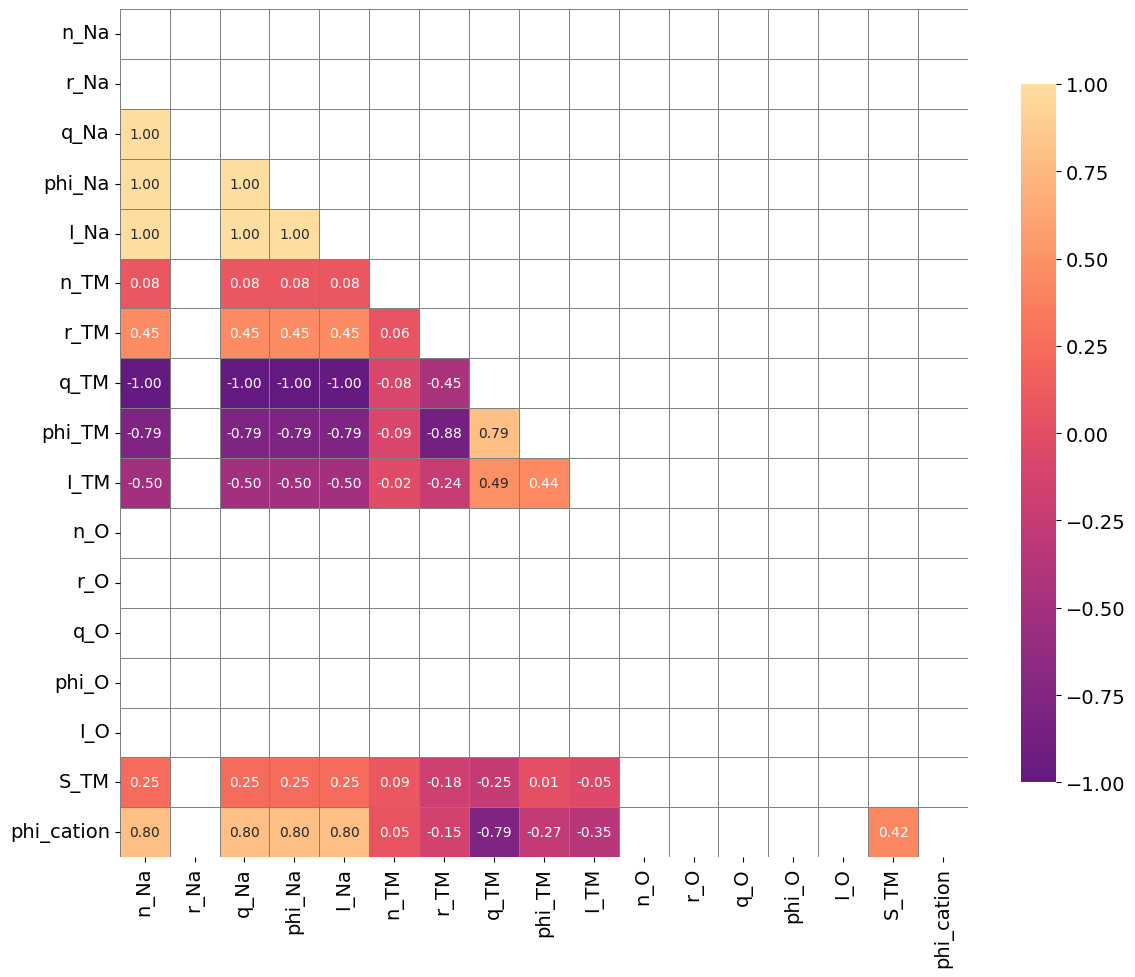

/tmp/ipython-input-2786659374.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orig_cmap = mpl.cm.get_cmap("magma")


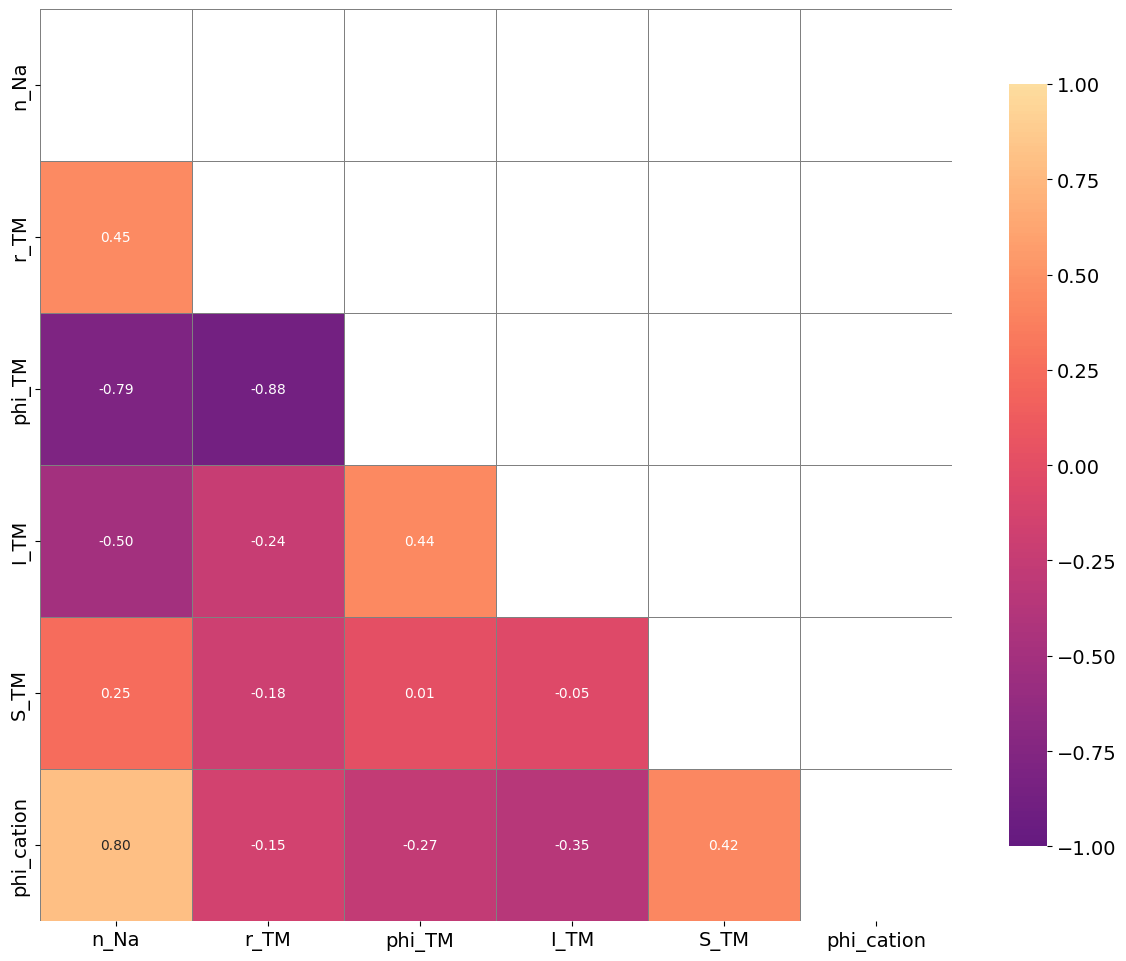

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Load the dataset from the CSV file
raw_url = "https://raw.githubusercontent.com/LIANGTING-WU/ML_Phase_Predictor/main/DNN-270-Training.csv"
data = pd.read_csv(raw_url)

# Define the list of feature names to be included in the correlation analysis
x_features_full = [
    "n_Na", "r_Na", "q_Na", "phi_Na", "I_Na",
    "n_TM",  "r_TM", "q_TM","phi_TM", "I_TM",
    "n_O",  "r_O", "q_O", "phi_O", "I_O", "S_TM", "phi_cation"
]

x_features = [
    "n_Na", "r_TM", "phi_TM", "I_TM", "S_TM", "phi_cation"
]

# Create a new DataFrame containing only the selected features
df_features = data[x_features_full]
# Calculate the Pearson correlation matrix for the selected features
corr = df_features.corr(method='pearson')
# Create a boolean mask for the upper triangle of the matrix
# This is used to hide the redundant, mirrored half of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
# --- Create a modified 'magma' colormap ---
# 1. Get the original 'magma' colormap object
orig_cmap = mpl.cm.get_cmap("magma")
# 2. Create a new list of colors by sampling the original map
#    This line "slices" the colormap, taking colors from 30% to 93% of the original range
new_colors = orig_cmap(np.linspace(0.3, 0.93, 256))
# 3. Create a new, modified colormap from this list of colors
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("magma_modified", new_colors)
# --- End of colormap modification ---
# Set up the matplotlib figure and define its size (width, height in inches)
plt.figure(figsize=(12, 10))
# Draw the heatmap using seaborn
ax = sns.heatmap(
    corr,
    mask=mask,           # Apply the mask to hide the upper triangle
    cmap=new_cmap,       # Use our custom-modified 'magma' colormap
    annot=True,          # Display the correlation values (annotations) in each cell
    fmt=".2f",           # Format the annotations to two decimal places
    linewidths=0.5,      # Set the width of the grid lines between cells
    cbar_kws={"shrink": 0.8}, # Make the color bar slightly smaller (80% of original height)
    square=True,         # Force the cells to be square-shaped
    linecolor='gray',    # Set the color of the grid lines
    vmin=-1,             # Set the minimum value for the color scale
    vmax=1,             # Set the maximum value for the color scale
    center=0             # Center the colormap at 0 (neutral correlation)
)
# --- Optional: Code to highlight NaN cells ---
# This block is left commented out as in the original code.
# Its purpose is to find any cells with NaN values (which can happen if a
# feature has zero variance) and draw a light gray box around them.
#
# nan_locs = np.argwhere(np.isnan(corr.values))
#
# for (i, j) in nan_locs:
#    # Add a non-filled rectangle patch over the NaN cell
#    rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='lightgray', linewidth=2)
#    ax.add_patch(rect)
# --- End of optional block ---
# Adjust the plot layout to ensure all elements (like labels) fit neatly
plt.tight_layout()
# Save the figure as a high-resolution PNG file
# dpi=600 ensures a high-quality image suitable for publications
#plt.savefig("pearson_correlation_matrix.png", dpi=600)
# Display the plot
plt.show()

# Reduce Features
df_features = data[x_features]

# Calculate the Pearson correlation matrix for the selected features
corr = df_features.corr(method='pearson')

# Create a boolean mask for the upper triangle of the matrix
# This is used to hide the redundant, mirrored half of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# --- Create a modified 'magma' colormap ---
# 1. Get the original 'magma' colormap object
orig_cmap = mpl.cm.get_cmap("magma")
# 2. Create a new list of colors by sampling the original map
#    This line "slices" the colormap, taking colors from 30% to 93% of the original range
new_colors = orig_cmap(np.linspace(0.3, 0.93, 256))
# 3. Create a new, modified colormap from this list of colors
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("magma_modified", new_colors)
# --- End of colormap modification ---

# Set up the matplotlib figure and define its size (width, height in inches)
plt.figure(figsize=(12, 10))

# Draw the heatmap using seaborn
ax = sns.heatmap(
    corr,
    mask=mask,           # Apply the mask to hide the upper triangle
    cmap=new_cmap,       # Use our custom-modified 'magma' colormap
    annot=True,          # Display the correlation values (annotations) in each cell
    fmt=".2f",           # Format the annotations to two decimal places
    linewidths=0.5,      # Set the width of the grid lines between cells
    cbar_kws={"shrink": 0.8}, # Make the color bar slightly smaller (80% of original height)
    square=True,         # Force the cells to be square-shaped
    linecolor='gray',    # Set the color of the grid lines
    vmin=-1,             # Set the minimum value for the color scale
    vmax=1,             # Set the maximum value for the color scale
    center=0             # Center the colormap at 0 (neutral correlation)
)

plt.tight_layout()
#plt.savefig("pearson_correlation_matrix_final.png", dpi=600)
plt.show()

**Models in *Science*, 2020, 370, 708-711**

Accuracy:   0.8926
Precision:  0.9327
Recall:     0.8151
F1 Score:   0.8700


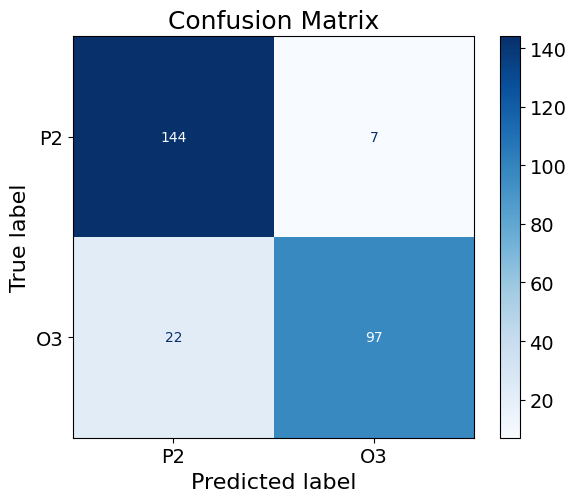

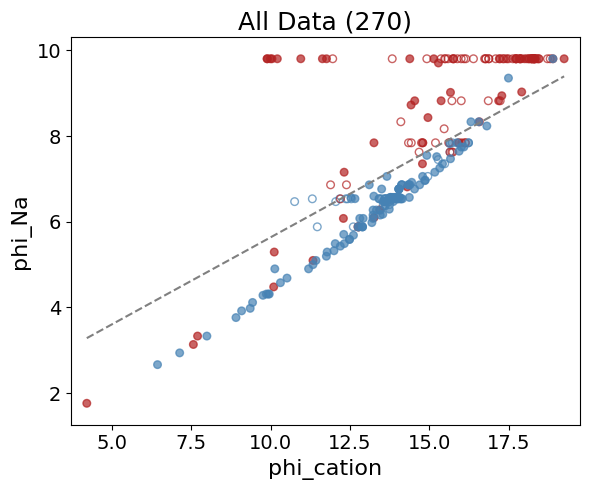

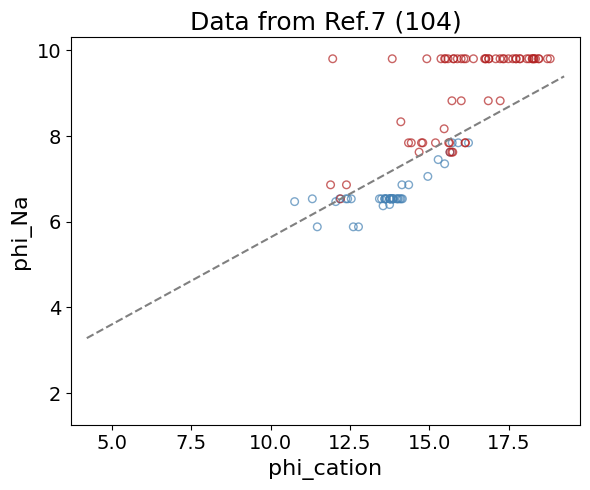

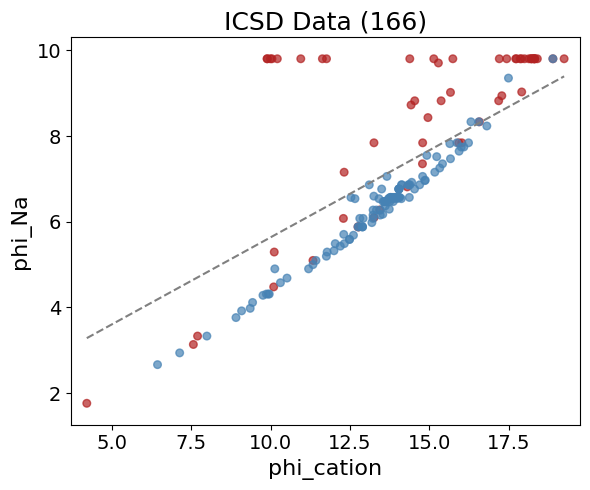

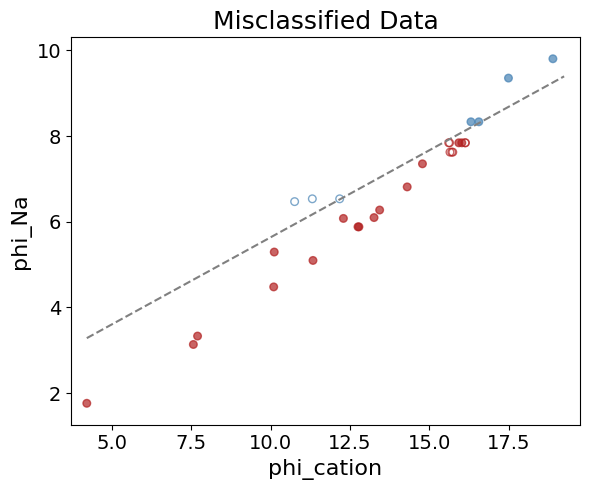

In [11]:
import os
from matplotlib.lines import Line2D

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    log_loss
)
from sklearn.metrics import ConfusionMatrixDisplay

# ----------------------- Set global font sizes for plots -----------------------
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# ================== Define features and target label ==================
x_features_linear = ["phi_cation", "phi_Na"]
y_feature = "Phase_EXP"

# Extract feature values into a numpy array (shape: (n_samples, 2))
x = data[x_features_linear].values
# Extract target values into a 1D numpy array (shape: (n_samples,))
y = data[y_feature].values.ravel()

# Extract individual variables for plotting and calculation
cp    = x[:, 0]  # CP will be the x-axis
na_ip = x[:, 1]  # Na_IP will be the y-axis

# ================== Define the decision boundary ==================
# Based on a model proposed in literature: boundary_line = 0.4065 * CP + 1.572
# Each data point has a corresponding boundary value.
# For plotting, we will draw this line across the entire x-range.
boundary_line = 0.4065 * cp + 1.572

# ================== Model Prediction ==================
# Rule: If Na_IP > boundary_line, predict 1 (O3), otherwise predict 0 (P2).
y_pred = (na_ip > boundary_line).astype(int)

# ================== Calculate classification metrics ==================
acc = accuracy_score(y, y_pred)
pre = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1  = f1_score(y, y_pred)

# --- Calculate Log Loss ---
# Define a sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate the logit (distance from the boundary)
logit = na_ip - boundary_line
# Convert logit to probability using sigmoid
prob  = sigmoid(logit)
# Create a 2D probability array [prob_class_0, prob_class_1] for log_loss function
proba_2d = np.column_stack([1 - prob, prob])

# Calculate the confusion matrix
cm = confusion_matrix(y, y_pred)

# Print the calculated metrics
print(f"Accuracy:   {acc:.4f}")
print(f"Precision:  {pre:.4f}")
print(f"Recall:     {rec:.4f}")
print(f"F1 Score:   {f1:.4f}")

# ================== Plot and Save Confusion Matrix ==================
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["P2", "O3"])
fig_cm, ax_cm = plt.subplots(figsize=(6, 5))
# Plot the matrix
disp.plot(cmap="Blues", values_format="d", ax=ax_cm)
ax_cm.set_title("Confusion Matrix")
plt.tight_layout()
# Save the figure with high resolution
#plt.savefig("ConfusionMatrix.png", dpi=600)
plt.show()

# ================== Define Unified Axis Limits for Scatter Plots ==================
x_min, x_max = cp.min(), cp.max()
y_min, y_max = na_ip.min(), na_ip.max()

# Create the decision boundary line for plotting across the global x-range
x_line = np.linspace(x_min, x_max, 200)
y_line = 0.4065 * x_line + 1.572

# Set colors based on the actual (true) labels:
# P2 (0) -> steelblue
# O3 (1) -> firebrick
actual_colors = np.array(['firebrick' if label == 1 else 'steelblue' for label in y])

# Create custom legend elements for scatter plots and the decision boundary
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='P2', markerfacecolor='steelblue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='O3', markerfacecolor='firebrick', markersize=10),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Decision Boundary')
]

# Define indices for different data subsets
indices_first104 = np.arange(104)
indices_remaining = np.arange(104, len(cp))
all_indices = np.arange(len(cp))

# ----------------------- 1. Scatter Plot: All Data -----------------------
fig_all, ax_all = plt.subplots(figsize=(6, 5))
# First 104 data points: Hollow circles (facecolors='none'), size 30
ax_all.scatter(cp[indices_first104], na_ip[indices_first104],
               s=30, facecolors='none',
               edgecolors=actual_colors[indices_first104],
               alpha=0.7)
# Remaining data points: Solid circles, size 30
ax_all.scatter(cp[indices_remaining], na_ip[indices_remaining],
               s=30, c=actual_colors[indices_remaining],
               alpha=0.7)
# Plot the decision boundary
ax_all.plot(x_line, y_line, color='gray', linestyle='--', label='Decision Boundary')
ax_all.set_title("All Data (270)")
ax_all.set_xlabel("phi_cation")
ax_all.set_ylabel("phi_Na")
# Set axis limits with a small padding
ax_all.set_xlim(x_min-0.5, x_max+0.5)
ax_all.set_ylim(y_min-0.5, y_max+0.5)
# ax_all.legend(handles=legend_elements, loc='best') # Legend is commented out
plt.tight_layout()
#plt.savefig("Scatter_AllData.png", dpi=600)
plt.show()

# ----------------------- 2. Scatter Plot: First 104 Data -----------------------
fig_first, ax_first = plt.subplots(figsize=(6, 5))
# Plot first 104 data points (hollow circles)
ax_first.scatter(cp[indices_first104], na_ip[indices_first104],
                 s=30, facecolors='none',
                 edgecolors=actual_colors[indices_first104],
                 alpha=0.7)
# Plot the decision boundary
ax_first.plot(x_line, y_line, color='gray', linestyle='--', label='Decision Boundary')
ax_first.set_title("Data from Ref.7 (104)")
ax_first.set_xlabel("phi_cation")
ax_first.set_ylabel("phi_Na")
ax_first.set_xlim(x_min-0.5, x_max+0.5)
ax_first.set_ylim(y_min-0.5, y_max+0.5)
# ax_first.legend(handles=legend_elements, loc='best') # Legend is commented out
plt.tight_layout()
#plt.savefig("Scatter_First104.png", dpi=600)
plt.show()

# ----------------------- 3. Scatter Plot: Remaining Data -----------------------
fig_remaining, ax_remaining = plt.subplots(figsize=(6, 5))
# Plot remaining data points (solid circles)
ax_remaining.scatter(cp[indices_remaining], na_ip[indices_remaining],
                     s=30, c=actual_colors[indices_remaining],
                     alpha=0.7)
# Plot the decision boundary
ax_remaining.plot(x_line, y_line, color='gray', linestyle='--', label='Decision Boundary')
ax_remaining.set_title("ICSD Data (166)")
ax_remaining.set_xlabel("phi_cation")
ax_remaining.set_ylabel("phi_Na")
ax_remaining.set_xlim(x_min-0.5, x_max+0.5)
ax_remaining.set_ylim(y_min-0.5, y_max+0.5)
# ax_remaining.legend(handles=legend_elements, loc='best') # Legend is commented out
plt.tight_layout()
#plt.savefig("Scatter_RemainingData.png", dpi=600)
plt.show()

# ----------------------- 4. Scatter Plot: Misclassified Data -----------------------
# Create a boolean mask for misclassified points
misclassified_mask = (y != y_pred)
# Get the indices of misclassified points
indices_misclassified = np.where(misclassified_mask)[0]

# Separate misclassified indices into the 'first 104' and 'remaining' groups
indices_misclassified_first = indices_misclassified[indices_misclassified < 104]
indices_misclassified_remaining = indices_misclassified[indices_misclassified >= 104]

fig_mis, ax_mis = plt.subplots(figsize=(6, 5))
# Plot misclassified from first 104 (hollow circles)
ax_mis.scatter(cp[indices_misclassified_first], na_ip[indices_misclassified_first],
               s=30, facecolors='none',
               edgecolors=actual_colors[indices_misclassified_first],
               alpha=0.7)
# Plot misclassified from remaining (solid circles)
ax_mis.scatter(cp[indices_misclassified_remaining], na_ip[indices_misclassified_remaining],
               s=30, c=actual_colors[indices_misclassified_remaining],
               alpha=0.7)
# Plot the decision boundary
ax_mis.plot(x_line, y_line, color='gray', linestyle='--', label='Decision Boundary')
ax_mis.set_title("Misclassified Data")
ax_mis.set_xlabel("phi_cation")
ax_mis.set_ylabel("phi_Na")
ax_mis.set_xlim(x_min-0.5, x_max+0.5)
ax_mis.set_ylim(y_min-0.5, y_max+0.5)
# ax_mis.legend(handles=legend_elements, loc='best') # Legend is commented out
plt.tight_layout()
#plt.savefig("Scatter_Misclassified.png", dpi=600)
plt.show()

**Logistic Regression**

Fold 1:
Accuracy:  0.9259
Precision: 0.9091
Recall:    0.9091
F1 Score:  0.9091
Confusion Matrix:
[[15  1]
 [ 1 10]]
----------------------------------------
Fold 2:
Accuracy:  0.8519
Precision: 0.9000
Recall:    0.7500
F1 Score:  0.8182
Confusion Matrix:
[[14  1]
 [ 3  9]]
----------------------------------------
Fold 3:
Accuracy:  0.8148
Precision: 1.0000
Recall:    0.5833
F1 Score:  0.7368
Confusion Matrix:
[[15  0]
 [ 5  7]]
----------------------------------------
Fold 4:
Accuracy:  0.8519
Precision: 1.0000
Recall:    0.6667
F1 Score:  0.8000
Confusion Matrix:
[[15  0]
 [ 4  8]]
----------------------------------------
Fold 5:
Accuracy:  0.8519
Precision: 0.9000
Recall:    0.7500
F1 Score:  0.8182
Confusion Matrix:
[[14  1]
 [ 3  9]]
----------------------------------------
Fold 6:
Accuracy:  0.9259
Precision: 0.8571
Recall:    1.0000
F1 Score:  0.9231
Confusion Matrix:
[[13  2]
 [ 0 12]]
----------------------------------------
Fold 7:
Accuracy:  0.9630
Precision: 1.0000
Recall: 

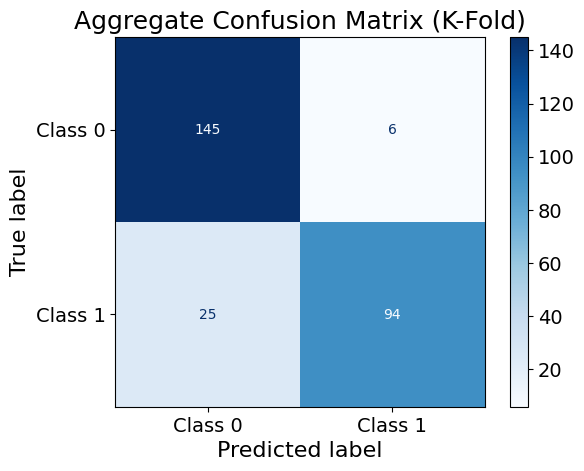

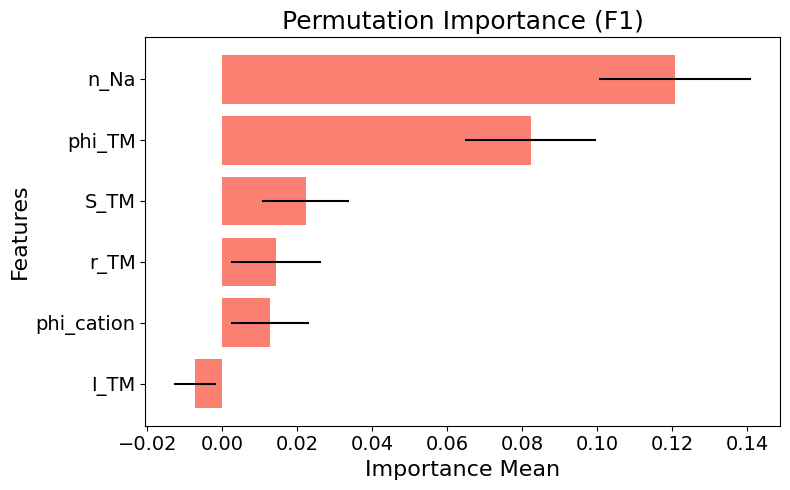

In [12]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance # for Permutation Importance
import random

# Set global font sizes for plots
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# ================== Set Random Seeds Start ==================
SEED = 31
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
# ================== Set Random Seeds End ==================

# ================== Define Features and Label ==================
x_features_LR = ["n_Na", "r_TM", "I_TM", "phi_TM", "S_TM", "phi_cation"]
y_feature_LR = "Phase_EXP"

x = data[x_features_LR].values
y = data[y_feature_LR].values.ravel()

# ================== K-Fold Setup ==================
k = 10 # number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=SEED)

fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
cm_sum = np.zeros((2, 2)) # assuming a binary classification

fold_num = 1

# ================== K-Fold Loop ==================
for train_index, test_index in skf.split(x, y):
    # ============== Split data into train and test for this fold ==============
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # ============== Data Scaling ==============
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled  = scaler.transform(x_test)

    # ============== Define and Train Logistic Model ==============
    logistic_model = LogisticRegression(
        random_state=SEED,
        max_iter=1000,
        C=0.05,
        solver='lbfgs'
    )
    logistic_model.fit(x_train_scaled, y_train)

    # ============== Predict on Test Set ==============
    y_test_pred_prob  = logistic_model.predict_proba(x_test_scaled)[:, 1]
    y_test_pred_class = (y_test_pred_prob > 0.5).astype(int)

    # ============== Compute Metrics ==============
    test_accuracy  = logistic_model.score(x_test_scaled, y_test)
    test_precision = precision_score(y_test, y_test_pred_class)
    test_recall    = recall_score(y_test, y_test_pred_class)
    test_f1        = f1_score(y_test, y_test_pred_class)
    test_cm        = confusion_matrix(y_test, y_test_pred_class)

    fold_accuracies.append(test_accuracy)
    fold_precisions.append(test_precision)
    fold_recalls.append(test_recall)
    fold_f1s.append(test_f1)
    cm_sum += test_cm

    # ============== Print fold metrics ==============
    print(f"Fold {fold_num}:")
    print(f"Accuracy:  {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall:    {test_recall:.4f}")
    print(f"F1 Score:  {test_f1:.4f}")
    print("Confusion Matrix:")
    print(test_cm)
    print("-" * 40)

    fold_num += 1

# ================== Summarize K-Fold Results ==================
mean_accuracy  = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall    = np.mean(fold_recalls)
mean_f1        = np.mean(fold_f1s)

std_accuracy   = np.std(fold_accuracies)
std_precision  = np.std(fold_precisions)
std_recall     = np.std(fold_recalls)
std_f1         = np.std(fold_f1s)

print("=== Overall K-Fold Results ===")
print(f"Accuracy:  {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Recall:    {mean_recall:.4f} ± {std_recall:.4f}")
print(f"F1 Score:  {mean_f1:.4f} ± {std_f1:.4f}")

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_sum.astype(int),
    display_labels=["Class 0", "Class 1"]
)
disp.plot(cmap='Blues', values_format='d')
plt.title('Aggregate Confusion Matrix (K-Fold)')
#plt.savefig("LR_Confusion.png", dpi=600)
plt.show()

# ====================================================================
# =========== Train Final Logistic Model on Entire Dataset ===========
# ====================================================================
scaler_final = StandardScaler()
x_scaled = scaler_final.fit_transform(x)

final_model = LogisticRegression(
    random_state=SEED,
    max_iter=1000,
    C=0.05,
    solver='lbfgs'
)
final_model.fit(x_scaled, y)

# ================== Permutation Importance ==================
# Evaluate how random permutation of each feature affects the final model performance
perm_result = permutation_importance(
    final_model, x_scaled, y,
    n_repeats=50,
    random_state=SEED,
    scoring='f1' # can change to accuracy, precision, recall, etc.
)

perm_importances     = perm_result.importances_mean
perm_importances_std = perm_result.importances_std

# Sort by importance
sorted_idx = np.argsort(perm_importances)
sorted_features = np.array(x_features_LR)[sorted_idx]
sorted_importances = perm_importances[sorted_idx]
sorted_importances_std = perm_importances_std[sorted_idx]

plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances, xerr=sorted_importances_std, color='salmon')
plt.title("Permutation Importance (F1)")
plt.xlabel("Importance Mean")
plt.ylabel("Features")
plt.tight_layout()
#plt.savefig("LR_Importance.png", dpi=600)
plt.show()

**Support Vector Machine**

Fold 1:
Accuracy:  0.9630
Precision: 1.0000
Recall:    0.9091
F1 Score:  0.9524
Confusion Matrix:
[[16  0]
 [ 1 10]]
----------------------------------------
Fold 2:
Accuracy:  0.9259
Precision: 1.0000
Recall:    0.8333
F1 Score:  0.9091
Confusion Matrix:
[[15  0]
 [ 2 10]]
----------------------------------------
Fold 3:
Accuracy:  0.8148
Precision: 1.0000
Recall:    0.5833
F1 Score:  0.7368
Confusion Matrix:
[[15  0]
 [ 5  7]]
----------------------------------------
Fold 4:
Accuracy:  0.8519
Precision: 1.0000
Recall:    0.6667
F1 Score:  0.8000
Confusion Matrix:
[[15  0]
 [ 4  8]]
----------------------------------------
Fold 5:
Accuracy:  0.8889
Precision: 0.9091
Recall:    0.8333
F1 Score:  0.8696
Confusion Matrix:
[[14  1]
 [ 2 10]]
----------------------------------------
Fold 6:
Accuracy:  0.9259
Precision: 0.9167
Recall:    0.9167
F1 Score:  0.9167
Confusion Matrix:
[[14  1]
 [ 1 11]]
----------------------------------------
Fold 7:
Accuracy:  0.9630
Precision: 1.0000
Recall: 

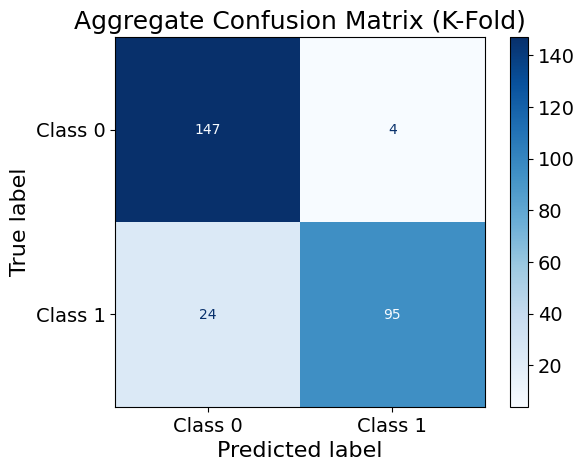

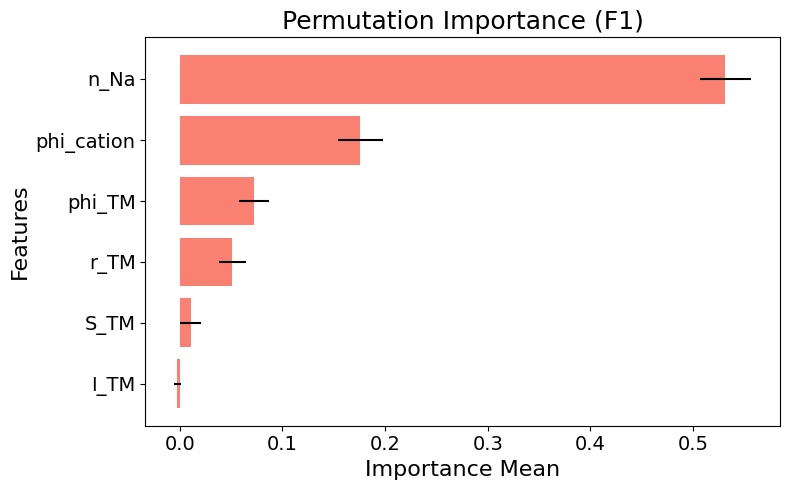

In [13]:
from sklearn.svm import SVC

# Set global font sizes for plots
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# ================== Define Features and Label ==================
x_features_SVM = ["n_Na", "r_TM", "I_TM", "phi_TM", "S_TM", "phi_cation"]
y_feature_SVM = "Phase_EXP"


x = data[x_features_SVM].values
y = data[y_feature_SVM].values.ravel()

# ================== K-Fold Setup ==================
k = 10  # number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=SEED)

fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
cm_sum = np.zeros((2, 2))  # assuming a binary classification

fold_num = 1

# ================== K-Fold Loop ==================
for train_index, test_index in skf.split(x, y):
    # ============== Split data ==============
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # ============== Data Scaling ==============
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled  = scaler.transform(x_test)

    # ============== Define and Train SVM Model ==============
    # Using a linear kernel for easier interpretation
    svm_model = SVC(
        kernel='linear',
        C=100,
        probability=True,  # Enable probability estimates for log_loss
        random_state=SEED
    )
    svm_model.fit(x_train_scaled, y_train)

    # ============== Predict on Test Set ==============
    y_test_pred_prob  = svm_model.predict_proba(x_test_scaled)[:, 1]
    y_test_pred_class = (y_test_pred_prob > 0.5).astype(int)

    # ============== Compute Metrics ==============
    test_cm        = confusion_matrix(y_test, y_test_pred_class)
    # Calculate accuracy from CM to be explicit
    test_accuracy = (test_cm[0, 0] + test_cm[1, 1]) / test_cm.sum()
    test_precision = precision_score(y_test, y_test_pred_class)
    test_recall    = recall_score(y_test, y_test_pred_class)
    test_f1        = f1_score(y_test, y_test_pred_class)

    # Append metrics for this fold
    fold_accuracies.append(test_accuracy)
    fold_precisions.append(test_precision)
    fold_recalls.append(test_recall)
    fold_f1s.append(test_f1)
    cm_sum += test_cm

    # ============== Print results for the current fold ==============
    print(f"Fold {fold_num}:")
    print(f"Accuracy:  {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall:    {test_recall:.4f}")
    print(f"F1 Score:  {test_f1:.4f}")
    print("Confusion Matrix:")
    print(test_cm)
    print("-" * 40)

    fold_num += 1

# ================== K-Fold Statistical Results ==================
mean_accuracy  = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall    = np.mean(fold_recalls)
mean_f1        = np.mean(fold_f1s)

std_accuracy   = np.std(fold_accuracies)
std_precision  = np.std(fold_precisions)
std_recall     = np.std(fold_recalls)
std_f1         = np.std(fold_f1s)

print("=== Overall K-Fold Results ===")
print(f"Accuracy:  {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Recall:    {mean_recall:.4f} ± {std_recall:.4f}")
print(f"F1 Score:  {mean_f1:.4f} ± {std_f1:.4f}")

print("\n=== Sum of Confusion Matrices Across Folds ===")

# Plot the aggregate confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_sum.astype(int),
    display_labels=["Class 0", "Class 1"]
)
disp.plot(cmap='Blues', values_format='d')
plt.title('Aggregate Confusion Matrix (K-Fold)')
#plt.savefig("SVM_Confusion.png", dpi=600)
plt.show()

# ====================================================================
# === Train Final SVM Model on All Data for Analysis ===
# ====================================================================
scaler_final = StandardScaler()
x_scaled = scaler_final.fit_transform(x)

final_model = SVC(
    kernel='linear',
    C=100,
    probability=True,
    random_state=SEED
)
final_model.fit(x_scaled, y)

# ================== 3) Permutation Importance ==================
# Observe the impact of each feature on the final model's F1 score
perm_result = permutation_importance(
    final_model, x_scaled, y,
    n_repeats=50,
    random_state=SEED,
    scoring='f1'  # Can be changed to accuracy, precision, recall, etc.
)

perm_importances     = perm_result.importances_mean
perm_importances_std = perm_result.importances_std

# Sort by importance
sorted_idx = np.argsort(perm_importances)
sorted_features = np.array(x_features_SVM)[sorted_idx]
sorted_importances = perm_importances[sorted_idx]
sorted_importances_std = perm_importances_std[sorted_idx]

plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances, xerr=sorted_importances_std, color='salmon')
plt.title("Permutation Importance (F1)")
plt.xlabel("Importance Mean")
plt.ylabel("Features")
plt.tight_layout()
#plt.savefig("SVM_Importance.png", dpi=600)
plt.show()

**Naive Bayes**

Fold 1:
Accuracy:  0.9259
Precision: 1.0000
Recall:    0.8182
F1 Score:  0.9000
Confusion Matrix:
[[16  0]
 [ 2  9]]
----------------------------------------
Fold 2:
Accuracy:  0.9259
Precision: 0.9167
Recall:    0.9167
F1 Score:  0.9167
Confusion Matrix:
[[14  1]
 [ 1 11]]
----------------------------------------
Fold 3:
Accuracy:  0.7778
Precision: 0.8750
Recall:    0.5833
F1 Score:  0.7000
Confusion Matrix:
[[14  1]
 [ 5  7]]
----------------------------------------
Fold 4:
Accuracy:  0.8519
Precision: 1.0000
Recall:    0.6667
F1 Score:  0.8000
Confusion Matrix:
[[15  0]
 [ 4  8]]
----------------------------------------
Fold 5:
Accuracy:  0.8148
Precision: 0.8889
Recall:    0.6667
F1 Score:  0.7619
Confusion Matrix:
[[14  1]
 [ 4  8]]
----------------------------------------
Fold 6:
Accuracy:  0.8519
Precision: 0.8333
Recall:    0.8333
F1 Score:  0.8333
Confusion Matrix:
[[13  2]
 [ 2 10]]
----------------------------------------
Fold 7:
Accuracy:  0.9259
Precision: 1.0000
Recall: 

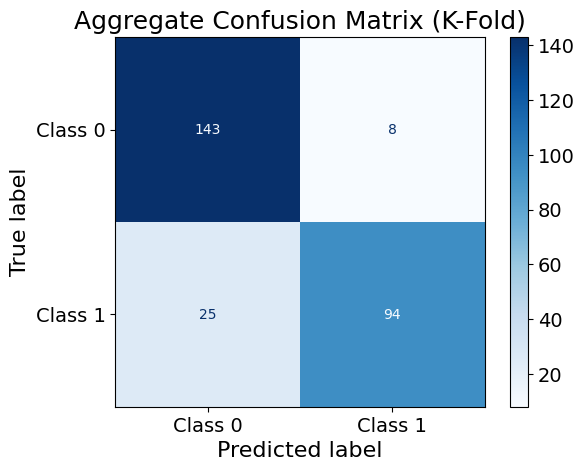

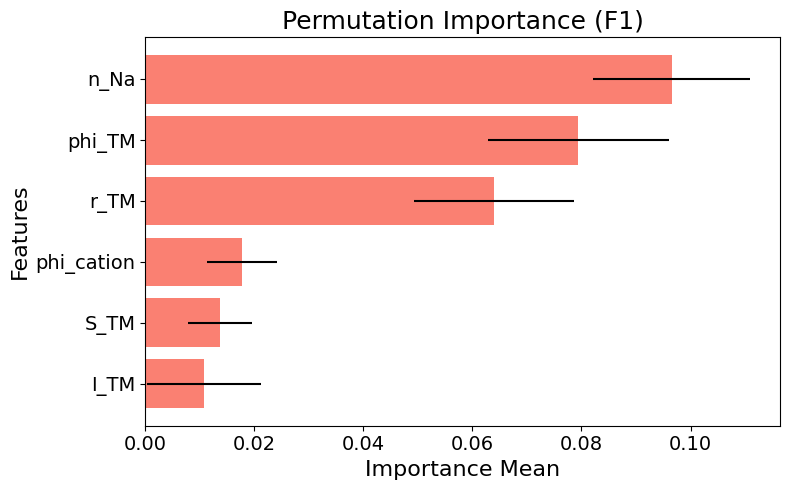

In [14]:
from sklearn.naive_bayes import GaussianNB

# ----------------------- Set Plot Parameters -----------------------
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# ================== Define Features and Label ==================
x_features_NB = ["n_Na", "r_TM", "I_TM", "phi_TM", "S_TM", "phi_cation"]
y_feature_NB = "Phase_EXP"

x = data[x_features_NB].values
y = data[y_feature_NB].values.ravel()

# ----------------------- K-Fold Setup -----------------------
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=SEED)

# Lists to accumulate metrics and confusion matrix from each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
cm_sum = np.zeros((2, 2))  # Assuming binary classification

fold_num = 1

# ----------------------- K-Fold Loop -----------------------
for train_index, test_index in skf.split(x, y):
    # --- Split data ---
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # --- Data Scaling ---
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled  = scaler.transform(x_test)

    # --- Train Gaussian Naive Bayes Model ---
    nb_model = GaussianNB()
    nb_model.fit(x_train_scaled, y_train)

    # --- Prediction and Evaluation ---
    y_test_pred_prob = nb_model.predict_proba(x_test_scaled)[:, 1]
    y_test_pred_class = (y_test_pred_prob > 0.5).astype(int)

    test_accuracy  = nb_model.score(x_test_scaled, y_test)
    test_precision = precision_score(y_test, y_test_pred_class)
    test_recall    = recall_score(y_test, y_test_pred_class)
    test_f1        = f1_score(y_test, y_test_pred_class)
    test_cm        = confusion_matrix(y_test, y_test_pred_class)

    # Accumulate metrics
    fold_accuracies.append(test_accuracy)
    fold_precisions.append(test_precision)
    fold_recalls.append(test_recall)
    fold_f1s.append(test_f1)
    cm_sum += test_cm

    # Print metrics for the current fold
    print(f"Fold {fold_num}:")
    print(f"Accuracy:  {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall:    {test_recall:.4f}")
    print(f"F1 Score:  {test_f1:.4f}")
    print("Confusion Matrix:")
    print(test_cm)
    print("-" * 40)

    fold_num += 1

# ----------------------- K-Fold Statistical Results -----------------------
mean_accuracy  = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall    = np.mean(fold_recalls)
mean_f1        = np.mean(fold_f1s)

std_accuracy   = np.std(fold_accuracies)
std_precision  = np.std(fold_precisions)
std_recall     = np.std(fold_recalls)
std_f1         = np.std(fold_f1s)

print("=== Overall K-Fold Results ===")
print(f"Accuracy:  {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Recall:    {mean_recall:.4f} ± {std_recall:.4f}")
print(f"F1 Score:  {mean_f1:.4f} ± {std_f1:.4f}")

print("\n=== Sum of Confusion Matrices Across Folds ===")
print(cm_sum.astype(int))

# Plot the aggregated confusion matrix from K-Folds
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_sum.astype(int),
    display_labels=["Class 0", "Class 1"]
)
disp.plot(cmap='Blues', values_format='d')
plt.title('Aggregate Confusion Matrix (K-Fold)')
#plt.savefig("NB_Confusion.png", dpi=600)
plt.show()


# ======================= Train Final Model on All Data =======================
scaler_final = StandardScaler()
x_scaled_full = scaler_final.fit_transform(x)

final_model = GaussianNB()
final_model.fit(x_scaled_full, y)

# ---------------------- Permutation Importance ----------------------
perm_result = permutation_importance(
    final_model, x_scaled_full, y,
    n_repeats=50,
    random_state=SEED,
    scoring='f1'
)

perm_importances     = perm_result.importances_mean
perm_importances_std = perm_result.importances_std

# Sort features by importance
sorted_idx = np.argsort(perm_importances)
sorted_features = np.array(x_features_NB)[sorted_idx]
sorted_importances = perm_importances[sorted_idx]
sorted_importances_std = perm_importances_std[sorted_idx]

# Plot permutation importance
plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances, xerr=sorted_importances_std, color='salmon')
plt.title("Permutation Importance (F1)")
plt.xlabel("Importance Mean")
plt.ylabel("Features")
plt.tight_layout()
#plt.savefig("NB_Importance.png", dpi=600)
plt.show()

**Random Forest**

Total training samples: 243
Total test samples: 27

=== Random Forest Model Evaluation (Test Set) ===
Accuracy:  0.8889
Precision: 0.8462
Recall:    0.9167
F1 Score:  0.8800
Confusion Matrix (Test):
[[13  2]
 [ 1 11]]

Depths of individual trees: [7, 10, 9, 13, 8]
Max depth: 13
Average depth: 9.4


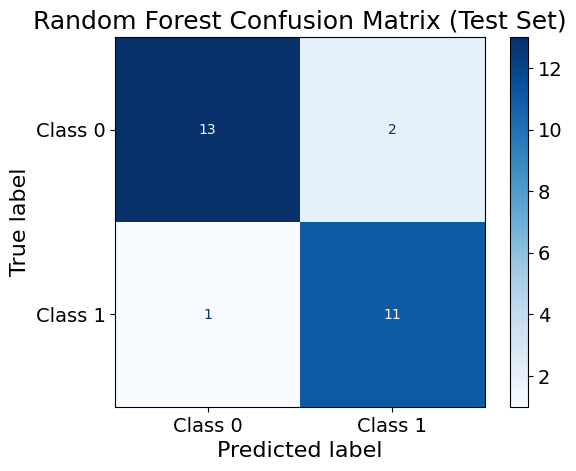


=== Random Forest Model Evaluation (Overall: Training + Test) ===
Confusion Matrix (Overall):
[[147   4]
 [  8 111]]


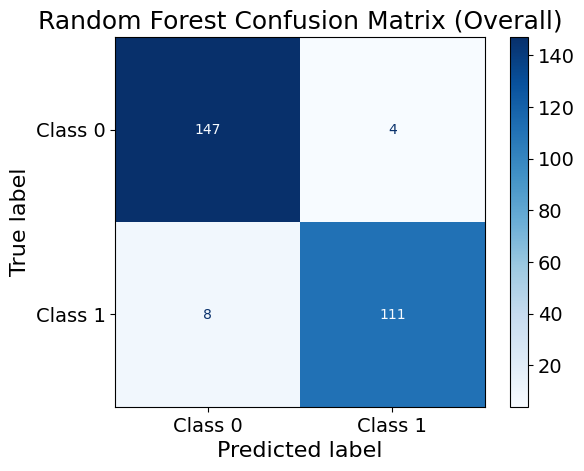

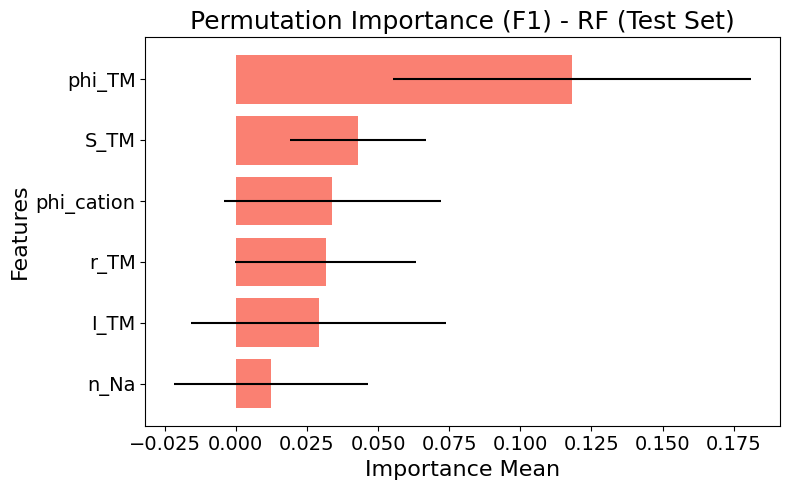

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# ================== Define Features and Label ==================
x_features_RF = ["n_Na", "r_TM", "I_TM", "phi_TM", "S_TM", "phi_cation"]
y_feature_RF = "Phase_EXP"

x = data[x_features_RF].values
y = data[y_feature_RF].values.ravel()

# ----------------------- Split Data (10% as test set, stratified) -----------------------
x_train_full, x_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.1, random_state=SEED, stratify=y
)

print("Total training samples:", x_train_full.shape[0])
print("Total test samples:", x_test.shape[0])
#print("Test set class distribution:", dict(zip(*np.unique(y_test, return_counts=True))))

# ----------------------- Data Scaling -----------------------
scaler = StandardScaler()
# Fit on the training data and transform it
x_train = scaler.fit_transform(x_train_full)
# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)
# Transform the entire (original) dataset for overall evaluation
x_full_scaled = scaler.transform(x)

# ----------------------- Create and Train Random Forest Model -----------------------
rf_model = RandomForestClassifier(n_estimators=5, random_state=SEED)
rf_model.fit(x_train, y_train_full)

# ----------------------- (Test Set) Prediction and Evaluation -----------------------
y_test_pred_prob = rf_model.predict_proba(x_test_scaled)[:, 1]
y_test_pred_class = (y_test_pred_prob > 0.5).astype(int)

accuracy_test  = rf_model.score(x_test_scaled, y_test)
precision_test = precision_score(y_test, y_test_pred_class)
recall_test    = recall_score(y_test, y_test_pred_class)
f1_test        = f1_score(y_test, y_test_pred_class)
cm_test        = confusion_matrix(y_test, y_test_pred_class)

print("\n=== Random Forest Model Evaluation (Test Set) ===")
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall:    {recall_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")
print("Confusion Matrix (Test):")
print(cm_test)

# --- Check tree depths ---
tree_depths = [estimator.tree_.max_depth for estimator in rf_model.estimators_]
print("\nDepths of individual trees:", tree_depths)
print("Max depth:", max(tree_depths))
print("Average depth:", sum(tree_depths) / len(tree_depths))

# Plot confusion matrix for the test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Class 0", "Class 1"])
disp_test.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix (Test Set)')
#plt.savefig("RF_Confusion_Test.png", dpi=600)
plt.show()

# ----------------------- (Overall Data) Evaluation -----------------------
# Predict on the entire scaled dataset (X_full_scaled) using the original labels (y)
y_full_pred_class = rf_model.predict(x_full_scaled)
cm_full = confusion_matrix(y, y_full_pred_class)

print("\n=== Random Forest Model Evaluation (Overall: Training + Test) ===")
print("Confusion Matrix (Overall):")
print(cm_full)

# Plot confusion matrix for the overall data
disp_full = ConfusionMatrixDisplay(confusion_matrix=cm_full, display_labels=["Class 0", "Class 1"])
disp_full.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix (Overall)')
#plt.savefig("RF_Confusion_Overall.png", dpi=600)
plt.show()

# ----------------------- Permutation Importance (on Test Set) -----------------------
perm_result = permutation_importance(
    rf_model, x_test_scaled, y_test,
    n_repeats=100,
    random_state=SEED,
    scoring='f1'
)
perm_importances     = perm_result.importances_mean
perm_importances_std = perm_result.importances_std

# Sort features by importance
sorted_idx = np.argsort(perm_importances)
sorted_features = np.array(x_features_RF)[sorted_idx]
sorted_importances = perm_importances[sorted_idx]
sorted_importances_std = perm_importances_std[sorted_idx]

# Plot permutation importance
plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances, xerr=sorted_importances_std, color='salmon')
plt.title("Permutation Importance (F1) - RF (Test Set)")
plt.xlabel("Importance Mean")
plt.ylabel("Features")
plt.tight_layout()
#plt.savefig("RF_PermutationImportance.png", dpi=600)
plt.show()

***k*-Nearest Neighbors**

Fold 1:
Accuracy:  0.9259
Precision: 0.9091
Recall:    0.9091
F1 Score:  0.9091
Confusion Matrix:
[[15  1]
 [ 1 10]]
----------------------------------------
Fold 2:
Accuracy:  0.8889
Precision: 0.9091
Recall:    0.8333
F1 Score:  0.8696
Confusion Matrix:
[[14  1]
 [ 2 10]]
----------------------------------------
Fold 3:
Accuracy:  0.8519
Precision: 1.0000
Recall:    0.6667
F1 Score:  0.8000
Confusion Matrix:
[[15  0]
 [ 4  8]]
----------------------------------------
Fold 4:
Accuracy:  0.8889
Precision: 1.0000
Recall:    0.7500
F1 Score:  0.8571
Confusion Matrix:
[[15  0]
 [ 3  9]]
----------------------------------------
Fold 5:
Accuracy:  0.8519
Precision: 0.9000
Recall:    0.7500
F1 Score:  0.8182
Confusion Matrix:
[[14  1]
 [ 3  9]]
----------------------------------------
Fold 6:
Accuracy:  0.9259
Precision: 0.9167
Recall:    0.9167
F1 Score:  0.9167
Confusion Matrix:
[[14  1]
 [ 1 11]]
----------------------------------------
Fold 7:
Accuracy:  0.9630
Precision: 1.0000
Recall: 

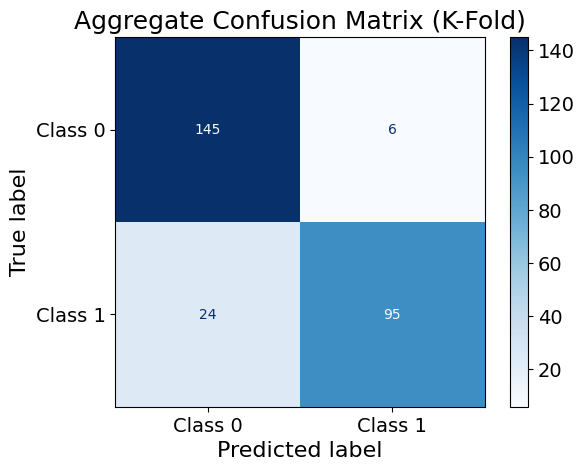

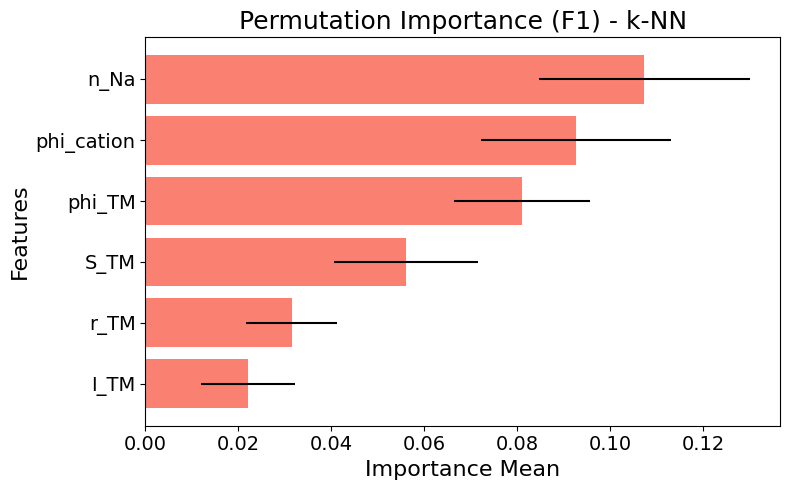

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# ----------------------- Set Plot Parameters -----------------------
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# ================== Define Features and Label ==================
x_features_kNN = ["n_Na", "r_TM", "I_TM", "phi_TM", "S_TM", "phi_cation"]
y_feature_kNN = "Phase_EXP"

x = data[x_features_kNN].values
y = data[y_feature_kNN].values.ravel()

# ----------------------- K-Fold Setup -----------------------
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=SEED)

# Lists to accumulate metrics and confusion matrix from each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
cm_sum = np.zeros((2, 2))  # Assuming binary classification

fold_num = 1

# ----------------------- K-Fold Loop -----------------------
for train_index, test_index in skf.split(x, y):
    # --- Split data ---
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # --- Data Scaling ---
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled  = scaler.transform(x_test)

    # --- Train k-NN Model ---
    knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors can be tuned
    knn_model.fit(x_train_scaled, y_train)

    # --- Prediction and Evaluation ---
    y_test_pred_prob = knn_model.predict_proba(x_test_scaled)[:, 1]
    y_test_pred_class = (y_test_pred_prob > 0.5).astype(int)

    test_accuracy  = knn_model.score(x_test_scaled, y_test)
    test_precision = precision_score(y_test, y_test_pred_class)
    test_recall    = recall_score(y_test, y_test_pred_class)
    test_f1        = f1_score(y_test, y_test_pred_class)
    test_cm        = confusion_matrix(y_test, y_test_pred_class)

    # Accumulate metrics
    fold_accuracies.append(test_accuracy)
    fold_precisions.append(test_precision)
    fold_recalls.append(test_recall)
    fold_f1s.append(test_f1)
    cm_sum += test_cm

    # Print metrics for the current fold
    print(f"Fold {fold_num}:")
    print(f"Accuracy:  {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall:    {test_recall:.4f}")
    print(f"F1 Score:  {test_f1:.4f}")
    print("Confusion Matrix:")
    print(test_cm)
    print("-" * 40)

    fold_num += 1

# ----------------------- K-Fold Statistical Results -----------------------
mean_accuracy  = np.mean(fold_accuracies)
mean_precision = np.mean(fold_precisions)
mean_recall    = np.mean(fold_recalls)
mean_f1        = np.mean(fold_f1s)

std_accuracy   = np.std(fold_accuracies)
std_precision  = np.std(fold_precisions)
std_recall     = np.std(fold_recalls)
std_f1         = np.std(fold_f1s)

print("=== Overall K-Fold Results ===")
print(f"Accuracy:  {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Recall:    {mean_recall:.4f} ± {std_recall:.4f}")
print(f"F1 Score:  {mean_f1:.4f} ± {std_f1:.4f}")

print("\n=== Sum of Confusion Matrices Across Folds ===")
print(cm_sum.astype(int))

# Plot the aggregated confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sum.astype(int),
                              display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Aggregate Confusion Matrix (K-Fold)')
#plt.savefig("kNN_Confusion.png", dpi=600)
plt.show()

# ----------------------- Train Final k-NN Model on All Data -----------------------
scaler_final = StandardScaler()
x_scaled_full = scaler_final.fit_transform(x)

final_model = KNeighborsClassifier(n_neighbors=5)
final_model.fit(x_scaled_full, y)

# ----------------------- Permutation Importance -----------------------
perm_result = permutation_importance(final_model, x_scaled_full, y,
                                     n_repeats=50, random_state=SEED, scoring='f1')
perm_importances     = perm_result.importances_mean
perm_importances_std = perm_result.importances_std

# Sort features by importance
sorted_idx = np.argsort(perm_importances)
sorted_features = np.array(x_features_kNN)[sorted_idx]
sorted_importances = perm_importances[sorted_idx]
sorted_importances_std = perm_importances_std[sorted_idx]

# Plot permutation importance
plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances, xerr=sorted_importances_std, color='salmon')
plt.title("Permutation Importance (F1) - k-NN")
plt.xlabel("Importance Mean")
plt.ylabel("Features")
plt.tight_layout()
#plt.savefig("kNN_Importance.png", dpi=600)
plt.show()

**Deep Neural Network Training**

Training data size: (230, 6)
Validation data size: (13, 6)
Test data size: (27, 6)
Epoch 1/90


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 - 8s - 4s/step - accuracy: 0.3217 - loss: 1.1794 - val_accuracy: 0.3846 - val_loss: 1.1913
Epoch 2/90
2/2 - 1s - 361ms/step - accuracy: 0.6043 - loss: 1.0228 - val_accuracy: 0.6154 - val_loss: 1.0259
Epoch 3/90
2/2 - 0s - 75ms/step - accuracy: 0.7174 - loss: 0.9719 - val_accuracy: 0.6923 - val_loss: 0.9096
Epoch 4/90
2/2 - 0s - 75ms/step - accuracy: 0.7435 - loss: 0.9277 - val_accuracy: 0.7692 - val_loss: 0.8316
Epoch 5/90
2/2 - 0s - 75ms/step - accuracy: 0.7739 - loss: 0.8969 - val_accuracy: 0.7692 - val_loss: 0.7898
Epoch 6/90
2/2 - 0s - 94ms/step - accuracy: 0.8043 - loss: 0.8647 - val_accuracy: 0.7692 - val_loss: 0.7684
Epoch 7/90
2/2 - 0s - 103ms/step - accuracy: 0.7826 - loss: 0.8481 - val_accuracy: 0.7692 - val_loss: 0.7524
Epoch 8/90
2/2 - 0s - 142ms/step - accuracy: 0.8261 - loss: 0.8151 - val_accuracy: 0.7692 - val_loss: 0.7389
Epoch 9/90
2/2 - 0s - 91ms/step - accuracy: 0.8304 - loss: 0.7909 - val_accuracy: 0.7692 - val_loss: 0.7239
Epoch 10/90
2/2 - 0s - 93ms/step - acc

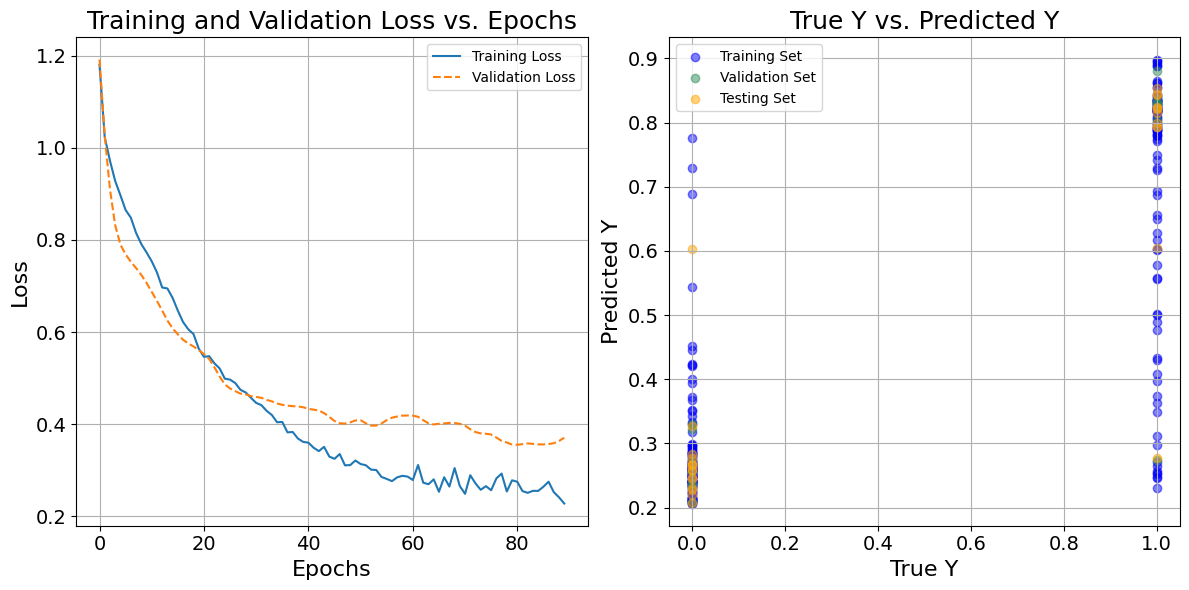

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping
import pickle
import shap  # For SHAP analysis

# ================== Define Features and Label ==================
x_features_DNN = ["n_Na", "r_TM", "I_TM", "phi_TM", "S_TM", "phi_cation"]
y_feature_DNN = "Phase_EXP"

x = data[x_features_DNN].values
y = data[[y_feature_DNN]].values

# ----------------------- Data Splitting -----------------------
# Split into 90% training_full and 10% test
x_train_full, x_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.1, random_state=SEED, stratify=y
)
# Split the training_full into 95% training and 5% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.05, random_state=SEED, stratify=y_train_full
)
print(f"Training data size: {x_train.shape}")
print(f"Validation data size: {x_val.shape}")
print(f"Test data size: {x_test.shape}")

# ----------------------- Data Standardization -----------------------
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)  # Ensure the test set uses the same scaling

# ----------------------- Save the Scaler -----------------------
# Save the fitted scaler object for future use (e.g., in production)
#with open('scaler.pkl', 'wb') as f:
#    pickle.dump(scaler, f)

# ----------------------- Define DNN Model -----------------------
model = Sequential([
    # Input layer
    Dense(12, input_shape=(x_train.shape[1],), kernel_initializer=HeNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.006)),
    Dropout(0.2),
    BatchNormalization(),
    ReLU(),

    # Hidden layer 1
    Dense(8, kernel_initializer=HeNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.006)),
    BatchNormalization(),
    ReLU(),

    # Hidden layer 2
    Dense(6, kernel_initializer=HeNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.006)),
    BatchNormalization(),
    ReLU(),

    # Hidden layer 3
    Dense(3, kernel_initializer=HeNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.006)),
    BatchNormalization(),
    ReLU(),

    # Output layer
    Dense(1, activation='sigmoid')
])

# ----------------------- Compile the Model -----------------------
# Set up a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.012,
    decay_steps=70,
    decay_rate=0.9
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ----------------------- Train the Model -----------------------
history = model.fit(
    x_train, y_train,
    epochs=900,
    batch_size=145,
    validation_data=(x_val, y_val),
    verbose=2
    # callbacks=[early_stopping] # Uncomment to use early stopping
)

# ----------------------- Evaluate on Test Set -----------------------
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# ----------------------- Get Predictions and Metrics -----------------------
# Get probability predictions
y_train_predicted = model.predict(x_train).flatten()
y_val_predicted = model.predict(x_val).flatten()
y_test_predicted = model.predict(x_test).flatten()

# Get class predictions for metrics
y_pred_prob = model.predict(x_test)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ----------------------- Plot Training History and Predictions -----------------------
plt.figure(figsize=(12, 6))

# Plot 1: Loss vs. Epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot 2: True Y vs. Predicted Y (as probabilities)
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_predicted, color='blue', label='Training Set', alpha=0.5)
plt.scatter(y_val, y_val_predicted, color='seagreen', label='Validation Set', alpha=0.5)
plt.scatter(y_test, y_test_predicted, color='orange', label='Testing Set', alpha=0.5)

plt.title('True Y vs. Predicted Y')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Reading Trained DNN Model**

/tmp/ipython-input-3347867088.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orig_cmap = mpl.cm.get_cmap("magma")


Training data size: (230, 6)
Validation data size: (13, 6)
Test data size: (27, 6)


Test Loss: 0.1090, Test Accuracy: 0.9630
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
=== Training Metrics ===
Accuracy:   0.9522
Precision:  0.9891
Recall:     0.9010
F1 Score:   0.9430
Log Loss:   0.1495
Confusion Matrix:
[[128   1]
 [ 10  91]]

=== Validation Metrics ===
Accuracy:   0.9231
Precision:  1.0000
Recall:     0.8333
F1 Score:   0.9091
Log Loss:   0.1947
Confusion Matrix:
[[7 0]
 [1 5]]

=== Testing Metrics ===
Accuracy:   0.9630
Precision:  1.0000
Recall:     0.9167
F1 Score:   0.9565
Log Loss:   0.0907
Confusion Matrix:
[[15  0]
 [ 1 11]]

=== Overall Metrics ===
Accuracy:   0.9519
Precision:  0.9907
Recall:     0.8992
F1 Score:   0.9427
Log Loss:   0.1458
Confusion Matrix:
[[150   1]
 [ 12 107]]



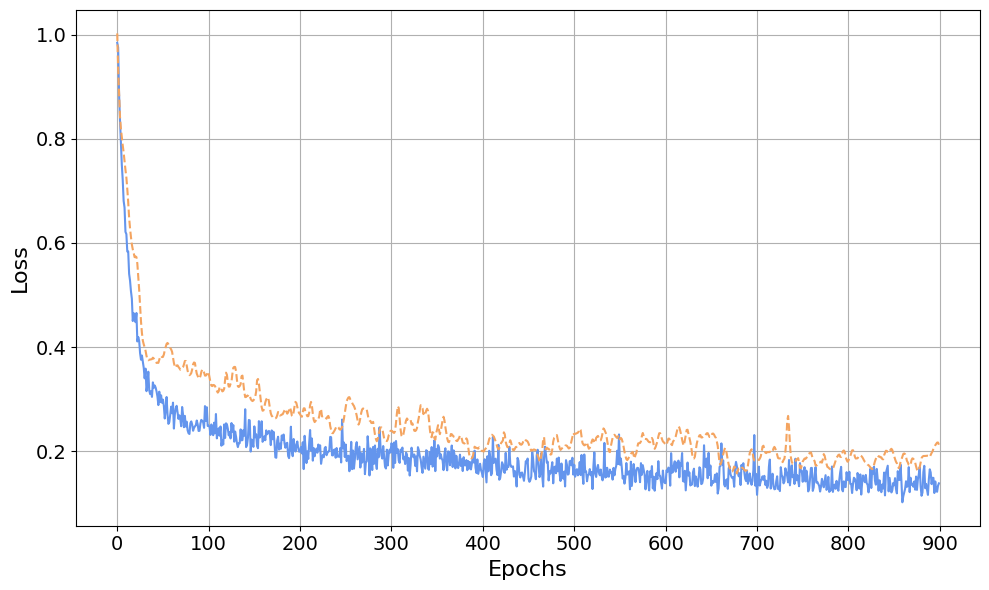

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_13
Received: inputs=['Tensor(shape=(230, 6))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_13
Received: inputs=['Tensor(shape=(460, 6))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_13
Received: inputs=['Tensor(shape=(270, 6))']
  warnings.warn

SHAP values (overall) type: <class 'numpy.ndarray'>
SHAP values raw shape (overall): (270, 6, 1)
SHAP values shape (overall) after squeeze/reshape: (270, 6)
x_overall shape: (270, 6)


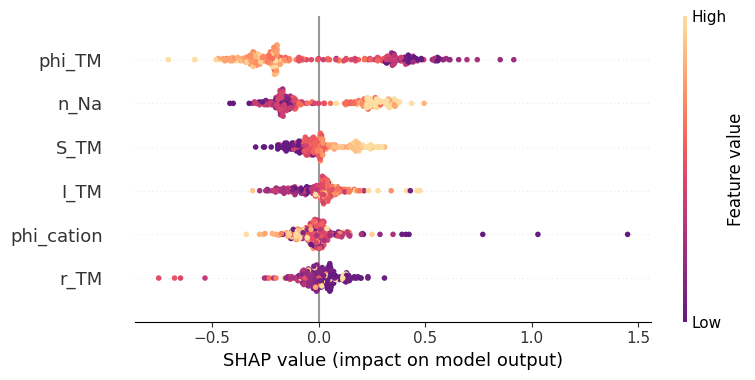

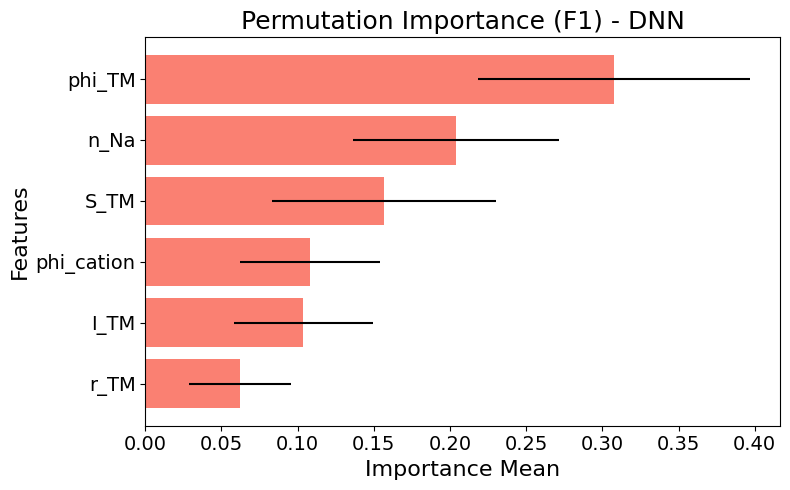

In [18]:
from tensorflow.keras.models import load_model
import pickle
import random
import shap
from sklearn.model_selection import train_test_split

# Google Colab Notebook: Ionic‐Params → DNN Prediction
!wget -q https://github.com/LIANGTING-WU/ML_Phase_Predictor/releases/download/v1.0/scaler.pkl -O scaler.pkl
!wget -q https://github.com/LIANGTING-WU/ML_Phase_Predictor/releases/download/v1.0/trained_model.h5 -O trained_model.h5
!wget -q https://github.com/LIANGTING-WU/ML_Phase_Predictor/releases/download/v1.0/training_history.pkl -O training_history.pkl

# ================== Plotting Style Configuration ==================
# Custom colormap for SHAP plots
orig_cmap = mpl.cm.get_cmap("magma")
new_colors = orig_cmap(np.linspace(0.3, 0.93, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("magma_modified", new_colors)

# Set global font sizes for plots
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# ================== Set Random Seeds ==================
SEED = 31
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

# ----------------------- Resetting Plot Parameters (if needed, otherwise redundant) -----------------------
# These lines override the previous ones if set again. Keeping for direct translation.
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# ================== Define Features and Label ==================
x_features_DNN = ["n_Na", "r_TM", "I_TM", "phi_TM", "S_TM", "phi_cation"]
y_feature_DNN = "Phase_EXP"

x = data[x_features_DNN].values
y = data[[y_feature_DNN]].values

# ================== Data Splitting ==================
# Split into training_full and test set first, then split validation from training_full
x_train_full, x_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.1, random_state=SEED, stratify=y
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.05, random_state=SEED, stratify=y_train_full
)
print(f"Training data size: {x_train.shape}")
print(f"Validation data size: {x_val.shape}")
print(f"Test data size: {x_test.shape}")

# ================== Data Standardization ==================
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val   = scaler.transform(x_val)
x_test  = scaler.transform(x_test)

# Concatenate all data for overall evaluation (if needed)
x_overall = np.concatenate([x_train, x_val, x_test], axis=0)
y_overall = np.concatenate([y_train, y_val, y_test], axis=0)

# ================== Load Saved Model and History ==================
# Ensure correct file paths for the saved model ("trained_model.h5") and history ("training_history.pkl")
model = load_model("trained_model.h5")
with open("training_history.pkl", "rb") as f:
    history = pickle.load(f)
# 'history' is a dictionary containing 'loss', 'val_loss', 'accuracy', etc.

# ================== Model Evaluation and Prediction ==================
# Evaluate on the test set
loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Get predictions (model outputs probabilities), flatten each dataset to 1D
y_train_pred_prob = model.predict(x_train).flatten()
y_val_pred_prob   = model.predict(x_val).flatten()
y_test_pred_prob  = model.predict(x_test).flatten()
y_overall_pred_prob = model.predict(x_overall).flatten()

# Convert probabilities to classes using a 0.5 threshold
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_val_pred   = (y_val_pred_prob > 0.5).astype(int)
y_test_pred  = (y_test_pred_prob > 0.5).astype(int)
y_overall_pred = (y_overall_pred_prob > 0.5).astype(int)

# ------------------ Function to Calculate Metrics ------------------
def calc_metrics(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred)
    # Form 2D probability matrix [P(0), P(1)] for log_loss
    proba_2d = np.column_stack([1 - y_prob, y_prob])
    ll  = log_loss(y_true, proba_2d)
    cm = confusion_matrix(y_true, y_pred)
    return acc, pre, rec, f1, ll, cm

# Calculate metrics for each dataset
metrics_train   = calc_metrics(y_train, y_train_pred, y_train_pred_prob)
metrics_val     = calc_metrics(y_val, y_val_pred, y_val_pred_prob)
metrics_test    = calc_metrics(y_test, y_test_pred, y_test_pred_prob)
metrics_overall = calc_metrics(y_overall, y_overall_pred, y_overall_pred_prob)

# ------------------ Print Metrics ------------------
def print_metrics(name, metrics):
    acc, pre, rec, f1, ll, cm = metrics
    print(f"=== {name} Metrics ===")
    print(f"Accuracy:   {acc:.4f}")
    print(f"Precision:  {pre:.4f}")
    print(f"Recall:     {rec:.4f}")
    print(f"F1 Score:   {f1:.4f}")
    print(f"Log Loss:   {ll:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print()

print_metrics("Training", metrics_train)
print_metrics("Validation", metrics_val)
print_metrics("Testing", metrics_test)
print_metrics("Overall", metrics_overall)

# ================== Plotting Results ==================
# (1) Training History Plot (Training/Validation Loss)
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], color='cornflowerblue', label='Training Loss')
plt.plot(history['val_loss'], color='sandybrown', label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks([0,100,200,300,400,500,600,700,800,900]) # Example: Adjust ticks based on your epochs
plt.grid()

plt.tight_layout()
#plt.savefig("DNN_Training_Analysis_newest.png", dpi=600)
plt.show()

# ================== SHAP Analysis ==================
# Initialize DeepExplainer with the trained model and a background dataset (e.g., part of X_train)
explainer = shap.DeepExplainer(model, x_train)

# ----------------- SHAP Analysis for the Overall Dataset -----------------
# Here, X_overall is the concatenated training, validation, and test data
shap_values_overall = explainer.shap_values(x_overall)

print("SHAP values (overall) type:", type(shap_values_overall))
shap_values_overall = np.array(shap_values_overall)
print("SHAP values raw shape (overall):", shap_values_overall.shape)
if shap_values_overall.shape[0] == 1:
    shap_values_overall = shap_values_overall[0]
if shap_values_overall.shape[-1] == 1:
    shap_values_overall = shap_values_overall.reshape(shap_values_overall.shape[0], shap_values_overall.shape[1])
print("SHAP values shape (overall) after squeeze/reshape:", shap_values_overall.shape)
print("x_overall shape:", x_overall.shape)

feature_names = np.array(x_features_DNN)
# Plot SHAP summary for the overall dataset
plt.figure()
shap.summary_plot(shap_values_overall, x_overall, feature_names=feature_names, cmap=new_cmap, show=False)
shap_overall_plot_path = "DNN_shap_summary_plot_overall_new.png"
#plt.savefig(shap_overall_plot_path, bbox_inches='tight', dpi=600)
plt.show()
plt.close()


# ================== Permutation Importance Analysis ==================
# Create a wrapper class for the Keras model to be compatible with scikit-learn's Permutation Importance
class DNNWrapper:
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def predict(self, x):
        # Flatten the output and apply the threshold to get binary class predictions
        preds = self.model.predict(x, verbose=0).flatten()
        return (preds > self.threshold).astype(int)

    def fit(self, x, y):
        # Dummy fit method, as the model is already trained
        return self

# Create an instance of the wrapper
dnn_wrapper = DNNWrapper(model)

# Perform Permutation Importance analysis
perm_result = permutation_importance(
    dnn_wrapper,
    x_test, # Typically performed on a hold-out set like the test set
    y_test,
    scoring='f1', # Use 'f1' or 'accuracy', 'recall', 'precision' as appropriate
    n_repeats=50, # Number of times to permute a feature
    random_state=SEED
)

perm_importances     = perm_result.importances_mean
perm_importances_std = perm_result.importances_std

# Sort features by their importance
sorted_idx = np.argsort(perm_importances)
sorted_features = np.array(x_features_DNN)[sorted_idx]
sorted_importances = perm_importances[sorted_idx]
sorted_importances_std = perm_importances_std[sorted_idx]

# Plot Permutation Importance
plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances, xerr=sorted_importances_std, color='salmon')
plt.title("Permutation Importance (F1) - DNN")
plt.xlabel("Importance Mean")
plt.ylabel("Features")
plt.tight_layout()
#plt.savefig("DNN_Permutation_Importance.png", dpi=600)
plt.show()